In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import Namespace


import xml.etree.ElementTree as ET
from types import SimpleNamespace as Namespace



In [140]:
# Path to the XML file
veh_1 = 20
veh_2 = 18
base_path = "../pareto/2_av_1/c_250/beta_0/seed_1/veh_"+str(veh_1)+"/eval/"
xml_path = base_path+"trajectory_from_veh_"+str(veh_2)+".net.xml"

# Parse the XML file
tree = ET.parse(xml_path)
root = tree.getroot()

# Extract lane and edge information
lanes = {}
for edge in root.findall("edge"):
    edge_id = edge.get("id")  # Extract edge ID
    if edge_id:  # Check if the edge has an ID
        # Collect all lane data under this edge
        for lane in edge.findall("lane"):
            lane_data = {
                "id": lane.get("id"),
                "index": lane.get("index"),
                "speed": float(lane.get("speed", 0)),
                "length": float(lane.get("length", 0)),
                "shape": lane.get("shape", "")
            }
            lanes[lane_data["id"]] = Namespace(**lane_data)

# Print the lanes dictionary
print(lanes)

{':bottom_0_0': namespace(id=':bottom_0_0', index='0', speed=13.89, length=0.1, shape='39.75,-1.60 39.81,-1.60'), ':top_0_0': namespace(id=':top_0_0', index='0', speed=13.89, length=0.1, shape='39.81,81.18 39.75,81.18'), 'left_0': namespace(id='left_0', index='0', speed=13.89, length=125.0, shape='39.75,81.18 38.14,81.14 36.49,81.05 34.85,80.88 33.22,80.65 31.61,80.36 30.00,80.00 28.41,79.58 26.83,79.10 25.28,78.55 23.75,77.95 22.25,77.28 20.77,76.55 19.32,75.77 17.91,74.93 16.53,74.03 15.19,73.08 13.88,72.07 12.62,71.02 11.40,69.91 10.23,68.76 9.10,67.56 8.02,66.32 6.99,65.04 6.01,63.72 5.08,62.35 4.21,60.96 3.40,59.53 2.65,58.06 1.95,56.57 1.31,55.06 0.73,53.51 0.22,51.95 -0.23,50.37 -0.62,48.77 -0.95,47.16 -1.21,45.53 -1.40,43.90 -1.53,42.26 -1.60,40.61 -1.60,38.97 -1.53,37.32 -1.40,35.68 -1.21,34.05 -0.95,32.42 -0.62,30.81 -0.23,29.21 0.22,27.63 0.73,26.06 1.31,24.52 1.95,23.00 2.65,21.51 3.40,20.05 4.21,18.62 5.08,17.22 6.01,15.86 6.99,14.54 8.02,13.25 9.10,12.01 10.23,10.81 11.40

 npz.files  ['step', 'id', 'type', 'speed', 'lane_id', 'lane_position', 'fuel']
 traj           step  id   type     speed  lane_id  lane_position        fuel
0           0   0     rl  0.000000  right_0       0.000000  837.222222
1           0   1  human  0.000000  right_0       7.100000  837.222222
2           0   2  human  0.000000  right_0      14.200000  837.222222
3           0   3  human  0.000000  right_0      21.300000  837.222222
4           0   4  human  0.000000  right_0      28.400000  837.222222
...       ...  ..    ...       ...      ...            ...         ...
240015  12000  15  human  4.535363   left_0      35.019752    0.000000
240016  12000  16  human  3.998304   left_0      46.228609    0.000000
240017  12000  17  human  3.698194   left_0      56.876542  673.255515
240018  12000  18  human  3.644417   left_0      67.317953  730.200595
240019  12000  19  human  3.808830   left_0      77.858282  769.743886

[240020 rows x 7 columns]


/Users/xiawu/miniconda3/envs/sumo_py310/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/xiawu/miniconda3/envs/sumo_py310/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/xiawu/miniconda3/envs/sumo_py310/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/Users/xiawu/miniconda3/envs/sumo_py310/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  retu

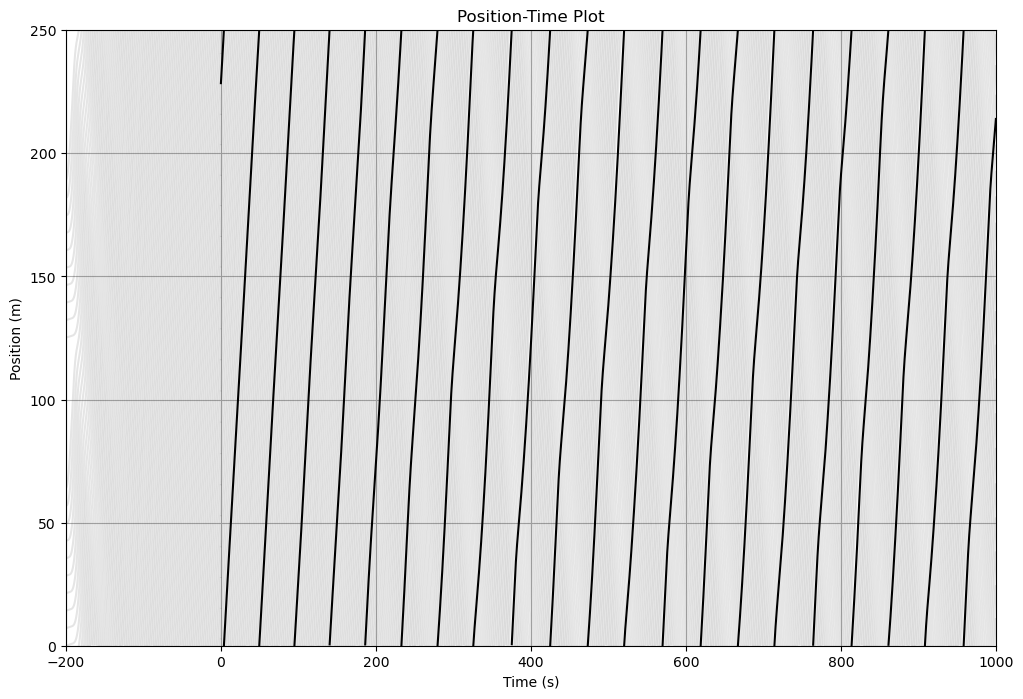

In [141]:

# File paths

eval_path = base_path+"eval_from_veh_"+str(veh_2)+".csv"
traj_path = base_path+"trajectory_from_veh_"+str(veh_2)+".npz"

# Load trajectory data
def load_trajectories(traj_path, min_len=0):
    npz = np.load(traj_path, allow_pickle=True)
    print(" npz.files ", npz.files)
    df = pd.DataFrame({k: npz[k] for k in npz.files})
    idxs, = np.where(df.step[:-1].values > df.step[1:].values)
    idxs = [0, *(idxs + 1), len(df)]
    return [df.iloc[start:end] for start, end in zip(idxs[:-1], idxs[1:]) if len(df.iloc[start:end]) >= min_len]

trajectories = load_trajectories(traj_path, min_len=8000)

# Simulation parameters
circ = 250
sim_step = 0.1
warmup_steps = 2000
label = 'Ours (DRL, Global)'

# path = traj_paths[label, circ]
# xml = E.from_path(path.replace('.npz', '.net.xml'))
# lanes = {e[0].id: Namespace(**e[0]) for e in xml if e._name == 'edge'}

lane_order = [':bottom_0_0', 'right_0', ':top_0_0', 'left_0']
lane_lengths = [float(lanes[k].length) for k in lane_order]
total_length = sum(lane_lengths)
pos_offset = dict(zip(lane_order, np.cumsum(lane_lengths) - lane_lengths))

# Plot position-time graph

for traj in trajectories:
    plt.figure(figsize=(12, 8))
    print(" traj ", traj)
    df = traj.copy()
    df['id'] = df['id'].astype(int)
    df['is_warmup'] = df['step'] < warmup_steps
    for (id, is_warmup), vehs in df.groupby(['id', 'is_warmup']):
        position = vehs.apply(lambda row: pos_offset[row.lane_id] + row.lane_position, axis=1).values
        breaks = position[:-1] > position[1:]
        idxs, = breaks.nonzero()
        for steps, pos in zip(np.split(vehs.step, 1 + idxs), np.split(position, 1 + idxs)):
            plt.plot((steps - warmup_steps) * sim_step, pos, color='black', alpha=1 if id == 0 and not is_warmup else 0.1)

    plt.ylabel("Position (m)")
    plt.xlabel("Time (s)")
    
    # plt.xlim(-warmup_steps*sim_step, 300)

    plt.xlim(-warmup_steps*sim_step, 1000)
    # plt.xlim(700, 1000)

    plt.ylim(0, total_length)
    plt.title("Position-Time Plot")
    plt.grid()
    plt.show()

In [83]:
eval_path

'../pareto/2_av_1/c_250/beta_0/seed_1/veh_2/eval/eval_from_veh_4.csv'

In [84]:
pd.read_csv(eval_path)

,step,rollout_time,horizon,speed,speed_rl,speed_rl_std,speed_human,collisions,collisions_human,fuel,...,pet_std,raw_ttc_mean,raw_ttc_std,raw_drac_mean,raw_drac_std,value_mean,ret_mean,adv_mean,explained_variance,rollout_end_time
0,1,30.647476,5000.0,4.035698,4.033701,0.709461,4.037696,0.0,0.0,2.773111e+06,...,0.092493,3351.461007,62556.935181,0.002154,0.005303,-0.003921,-28.620279,-28.616358,0.000110,0.064441
1,2,139.493227,5000.0,6.450249,6.459731,2.076232,6.440767,0.0,0.0,2.929911e+06,...,0.089473,5796.453723,298310.893252,0.002060,0.006844,-0.005591,0.170070,0.175661,-0.005055,0.065444
2,3,142.973748,5000.0,7.790025,7.786975,0.713629,7.793075,0.0,0.0,2.871938e+06,...,0.078702,4175.471896,74847.298544,0.000826,0.002386,-0.007553,0.598320,0.605874,-0.004281,0.058491


In [85]:
SingleRingPlots = "."
def single_ring_key(path):
    method, circ = re.match('(.+) circumference=(\d+)', path.name).groups()
    return method, int(circ)
eval_paths, traj_paths = ("../pareto/2_av_1/c_250/beta_0/seed_1/veh_2/evaluation.csv", "../pareto/2_av_1/c_250/beta_0/seed_1/veh_2/trajectories.npz")

eval_circumferences = 250
sim_step = 0.1
warmup_steps = 2000

In [5]:
cache = {}
for k, path in traj_paths.items():
    if k not in cache:
        npz = np.load(path)
        cache[k] = trajectories = split_trajectories(pd.DataFrame({k: npz[k] for k in npz.files}), 8000)
        assert len(trajectories) == 10

AttributeError: 'str' object has no attribute 'items'

In [45]:
for k, path in traj_paths.items():
    if k not in cache:
        npz = np.load(path)
        cache[k] = trajectories = split_trajectories(pd.DataFrame({k: npz[k] for k in npz.files}), 8000)
        assert len(trajectories) == 10
circ = 250
sim_step = 0.1
warmup_steps = 2000
label = 'Ours (DRL, Global)'

plt.figure(figsize=(6, 4))
path = traj_paths[label, circ]
xml = E.from_path(path.replace('.npz', '.net.xml'))
lanes = {e[0].id: Namespace(**e[0]) for e in xml if e._name == 'edge'}

df = cache[label, circ][0]
df.id = df.id.astype(int)
lane_order = [':bottom_0_0', 'right_0', ':top_0_0', 'left_0']
lane_lengths = [float(lanes[k].length) for k in lane_order]
total_length = sum(lane_lengths)
pos_offset = dict(zip(lane_order, np.cumsum(lane_lengths) - lane_lengths))
df['is_warmup'] = df.step < warmup_steps
for (id, is_warmup), vehs in df.groupby(['id', 'is_warmup']):
    position = vehs.apply(lambda row: pos_offset[row.lane_id] + row.lane_position, axis=1).values
    breaks = position[:-1] > position[1:]
    idxs, = breaks.nonzero()
    for steps, pos in zip(np.split(vehs.step, 1 + idxs), np.split(position, 1 + idxs)):
        plt.plot((steps - warmup_steps) * sim_step, pos, color='black', alpha=1 if id == 0 and not is_warmup else 0.3)
plt.ylabel('Position (m)')
plt.xlabel('Time (s)')
plt.xlim([-warmup_steps * sim_step, 200])
plt.ylim([0, total_length])
plt.show()

AttributeError: 'str' object has no attribute 'items'

In [57]:
def process_data(base_path, veh_num_array, circumference=1.0):
    """
    Process data for a given base path and vehicle range.

    Args:
        base_path (str): Path to the base directory containing data.
        veh_num_array (list): List of vehicle numbers to process.
        circumference (float): Circumference of the track (default is 1.0).

    Returns:
        tuple: (density, flow, speed_ls, raw_ttc_mean, raw_drac_mean)
    """
    # Initialize lists to store processed data
    speed_ls = []
    speed_rl_ls = []
    speed_human_ls = []
    collisions_ls = []
    raw_ttc_mean = []
    raw_drac_mean = []
    
    # Process each vehicle in the provided range
    for veh_num in veh_num_array:
        # Read and process data
        path = f"{base_path}/veh_{veh_num}/train_results.csv"
        data = pd.read_csv(path)
        print("data shape: ", data.shape )
        speed_ls.append(np.mean(data["speed"][-2:]))
        speed_rl_ls.append(np.mean(data["speed_rl"][-2:]))
        speed_human_ls.append(np.mean(data["speed_human"][-2:]))
        collisions_ls.append(np.mean(data["collisions"][-2:]))
        raw_ttc_mean.append(np.mean(data["raw_ttc_mean"][-2:]))
        raw_drac_mean.append(np.mean(data["raw_drac_mean"][-2:]))
    
    # Calculate density and flow
    density = np.array(veh_num_array)/(circumference * 1e-3)
    flow = density * np.array(speed_ls) * 3.6  # Convert speed to km/h

    return density, flow, speed_ls,speed_rl_ls, speed_human_ls,collisions_ls,  raw_ttc_mean, raw_drac_mean

In [58]:
density * np.array(speed_ls)

array([1.8331610e+01, 5.0549000e+01, 1.0705950e+02, 7.0577640e+01,
       1.1068659e+02, 1.0057952e+02, 9.2862720e-04, 5.8906200e+01,
       3.8058603e-04, 3.3651840e+01])

 config:  {'base_path': '../pareto/av_1/c_200/beta_0', 'veh_num_array': [2, 4, 10, 12, 14, 16, 18, 20, 22, 24], 'label': 'Beta 0'}
data shape:  (51, 43)
data shape:  (51, 43)
data shape:  (51, 43)
data shape:  (51, 43)
data shape:  (51, 43)
data shape:  (51, 43)
data shape:  (51, 43)
data shape:  (51, 43)
data shape:  (51, 43)
data shape:  (51, 43)
 config:  {'base_path': '../pareto/av_1/c_200/beta_0_5', 'veh_num_array': [2, 4, 10, 12, 14, 16, 18, 20, 22, 24], 'label': 'Beta 0.5'}
data shape:  (51, 43)
data shape:  (51, 43)
data shape:  (51, 43)
data shape:  (51, 43)
data shape:  (51, 43)
data shape:  (51, 43)
data shape:  (51, 43)
data shape:  (51, 43)
data shape:  (51, 43)
data shape:  (51, 43)
 config:  {'base_path': '../pareto/av_1/c_200/beta_1', 'veh_num_array': [2, 4, 10, 12, 14, 16, 18, 20, 22, 24], 'label': 'Beta 1'}
data shape:  (51, 43)
data shape:  (51, 43)
data shape:  (51, 43)
data shape:  (51, 43)
data shape:  (51, 43)
data shape:  (51, 43)
data shape:  (51, 43)
data shap

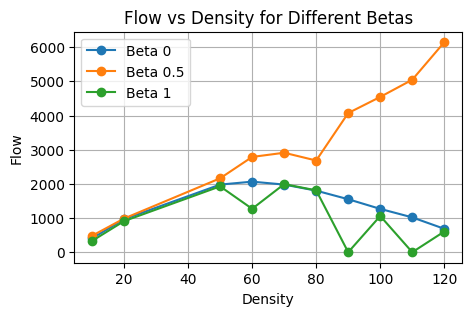

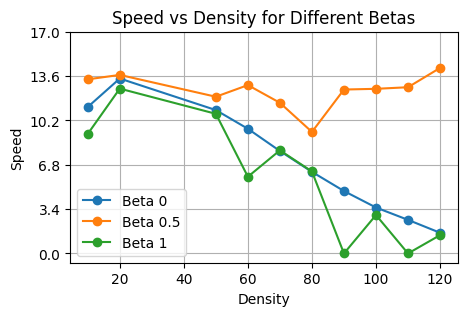

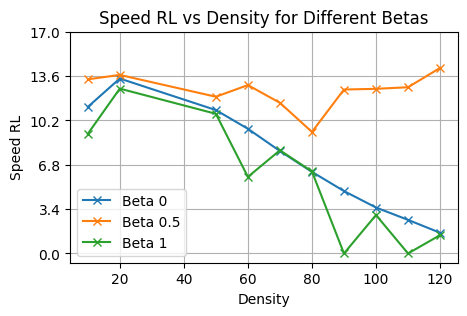

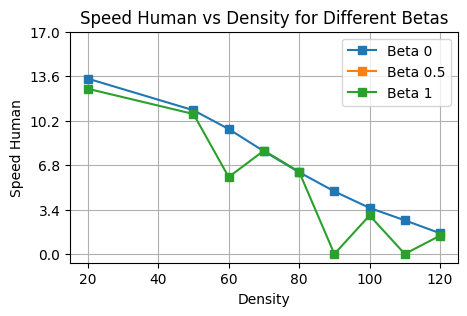

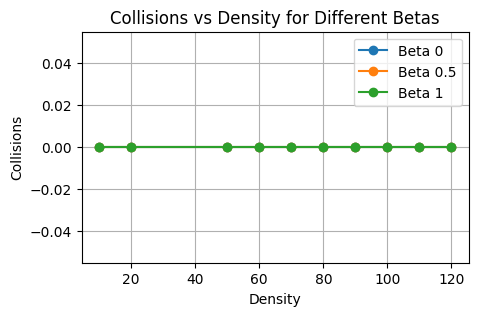

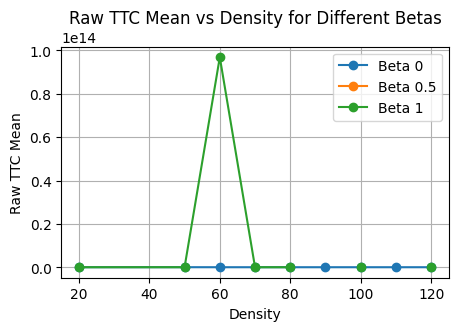

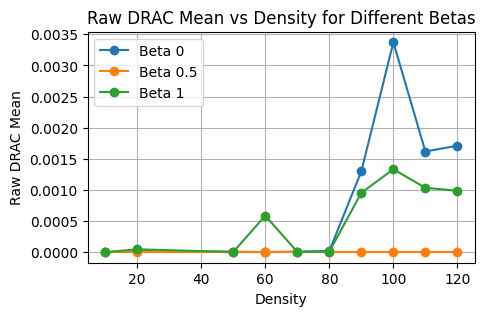

In [59]:
# Plot all metrics
metrics = ["Flow", "Speed", "Speed RL", "Speed Human", "Collisions", "Raw TTC Mean", "Raw DRAC Mean"]
speed_ls_betas = []
flow_ls_betas = []

for metric in metrics:
    plt.figure(figsize=fig_size)
    for config in configs:
        print(" config: ", config)
        # Process data
        density, flow, speed_ls, speed_rl_ls, speed_human_ls, collisions_ls, raw_ttc_mean, raw_drac_mean = process_data(
            config["base_path"], config["veh_num_array"], circumference=circumference)
        speed_ls_betas.append(np.array(speed_ls))
        flow_ls_betas.append(np.array(flow))
        # Select metric to plot
        if metric == "Flow":
            plt.plot(density, flow, marker='o', label=config["label"])
            ylabel = "Flow"
        elif metric == "Speed":
            plt.plot(density, speed_ls, marker='o', label=config["label"])
            ylabel = "Speed"
        elif metric == "Speed RL":
            plt.plot(density, speed_rl_ls, marker='x', label=config["label"])
            ylabel = "Speed RL"
        elif metric == "Speed Human":
            plt.plot(density, speed_human_ls, marker='s', label=config["label"])
            ylabel = "Speed Human"
        elif metric == "Collisions":
            plt.plot(density, collisions_ls, marker='o', label=config["label"])
            ylabel = "Collisions"
        elif metric == "Raw TTC Mean":
            plt.plot(density, raw_ttc_mean, marker='o', label=config["label"])
            ylabel = "Raw TTC Mean"
        elif metric == "Raw DRAC Mean":
            plt.plot(density, raw_drac_mean, marker='o', label=config["label"])
            ylabel = "Raw DRAC Mean"

    # Finalize each plot
    plt.xlabel("Density")
    plt.ylabel(ylabel)
    plt.title(f"{metric} vs Density for Different Betas")
    plt.legend()
    plt.grid(True)

    # Set y-ticks for speed-related metrics
    if metric in ["Speed", "Speed RL", "Speed Human"]:
        plt.yticks(np.linspace(0, 17, 6))  # Y-ticks from 0 to 17 with 6 intervals

# Show all plots
plt.show()



In [60]:

# # Define color fader function for gradient color
# def colorFader(c1, c2, mix=0):
#     """ Linear interpolation between two colors `c1` and `c2` """
#     return tuple(c1[i] * (1 - mix) + c2[i] * mix for i in range(3))

# color_start=(0.7, 0.7, 0.9)
# color_end=(0.1, 0.1, 0.6)

In [61]:
# # base_path =  "automatic_vehicular_control/pareto/av_1/c_200/beta_0/"
# base_path =  "../pareto/av_1/c_200/beta_0/"
# speed_ls_0 = []
# speed_ls_rl_0 = []
# speed_ls_human_0 = []
# collision_0 = []
# raw_ttc_mean_0 = []
# raw_drac_mean_0 = []
# # veh_num_array = [i for i in range(14, 26, 2)]
# # veh_num_array = [i for i in range(4, 26, 2)]
# for veh_num in veh_num_array:
#     # print(veh_num)
#     speed = np.mean(pd.read_csv(base_path + f"veh_{str(veh_num)}/train_results.csv")["speed"][-10:])
#     speed_ls_0.append(speed)
#     speed_ls_rl_0.append(np.mean(pd.read_csv(base_path + f"veh_{str(veh_num)}/train_results.csv")["speed_rl"][-10:]))
#     speed_ls_human_0.append(np.mean(pd.read_csv(base_path + f"veh_{str(veh_num)}/train_results.csv")["speed_human"][-10:]))
#     raw_ttc_mean_0.append(np.mean(pd.read_csv(base_path + f"veh_{str(veh_num)}/train_results.csv")["raw_ttc_mean"][-10:]))
#     raw_drac_mean_0.append(np.mean(pd.read_csv(base_path + f"veh_{str(veh_num)}/train_results.csv")["raw_drac_mean"][-10:]))

# density_0 = np.array(veh_num_array) / (circumference * 1e-3)
# flow_0 = np.array(density_0 * np.array(speed_ls_0)) * 3.6 

# plt.plot(density_0, flow_0, marker='o', label="Beta 0")


### Beta 0

In [62]:
def load_data(base_path, veh_num_array):
    """
    Load data for a given base path and vehicle numbers.

    Args:
        base_path (str): Path to the base directory.
        veh_num_array (list): List of vehicle numbers.

    Returns:
        dict: Loaded data for all vehicle numbers.
    """
    return {
        veh_num: np.load(base_path + f"/veh_{str(veh_num)}/mean_dict.npz", allow_pickle=True)
        for veh_num in veh_num_array
    }

def plot_mean_rewards_for_configs(configs, veh_num_array, y_label, color_start=(0.7, 0.7, 0.9), color_end=(0.1, 0.1, 0.6)):
    """
    Plot mean rewards for multiple configurations of vehicle data.

    Args:
        configs (list): List of configuration dictionaries with base_path and labels.
        veh_num_array (list): List of vehicle numbers.
        y_label (str): Metric to plot (e.g., "reward" or "speed").
        color_start (tuple): RGB color tuple for the start of the gradient.
        color_end (tuple): RGB color tuple for the end of the gradient.
    """
    def colorFader(c1, c2, mix=0):
        """Linear interpolation between two colors `c1` and `c2`."""
        return tuple(c1[i] * (1 - mix) + c2[i] * mix for i in range(3))

    # Iterate over each configuration
    for config in configs:
        # Load data for the configuration
        loaded_data = load_data(config["base_path"], veh_num_array)
        
        # Calculate the number of rows and columns for subplots
        n_cols = 3
        n_rows = -(-len(veh_num_array) // n_cols)  # Ceiling division
        
        # Set up the subplot grid
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(9, 3.5 * n_rows), squeeze=False)
        

        # Plot mean rewards for each vehicle
        for idx, veh_num in enumerate(veh_num_array):
            row, col = divmod(idx, n_cols)
            
            # Load the mean_dict for the current vehicle and get rewards
            mean_dict_loaded = {key: loaded_data[veh_num][key].item() for key in loaded_data[veh_num_array[0]]}
            mean_rewards = mean_dict_loaded["0"][y_label]
            # Plot episode speed trend            
            n = len(mean_rewards)
            # Plot rewards with gradient coloring
            for i in range(n):
                color = colorFader(color_start, color_end, i / n)
                axes[row, col].plot(mean_rewards[i], color=color, alpha=0.7)
            
            axes[row, col].set_title(f"Veh {veh_num}")
            axes[row, col].set_xlabel("Episode")
            axes[row, col].set_ylabel(y_label)
        
            if y_label == "speed":
                axes[row, col].set_yticks(np.linspace(0, 17, 2))  # Creates y-ticks [0, 0.2, 0.4, 0.6, 0.8, 1]
                
        # Remove empty subplots if veh_num_array is not a perfect multiple of n_cols
        for idx in range(len(veh_num_array), n_rows * n_cols):
            fig.delaxes(axes.flatten()[idx])
        
        # Finalize and show the plot
        plt.suptitle(config["label"], fontsize=16)
        plt.tight_layout()
        plt.show()



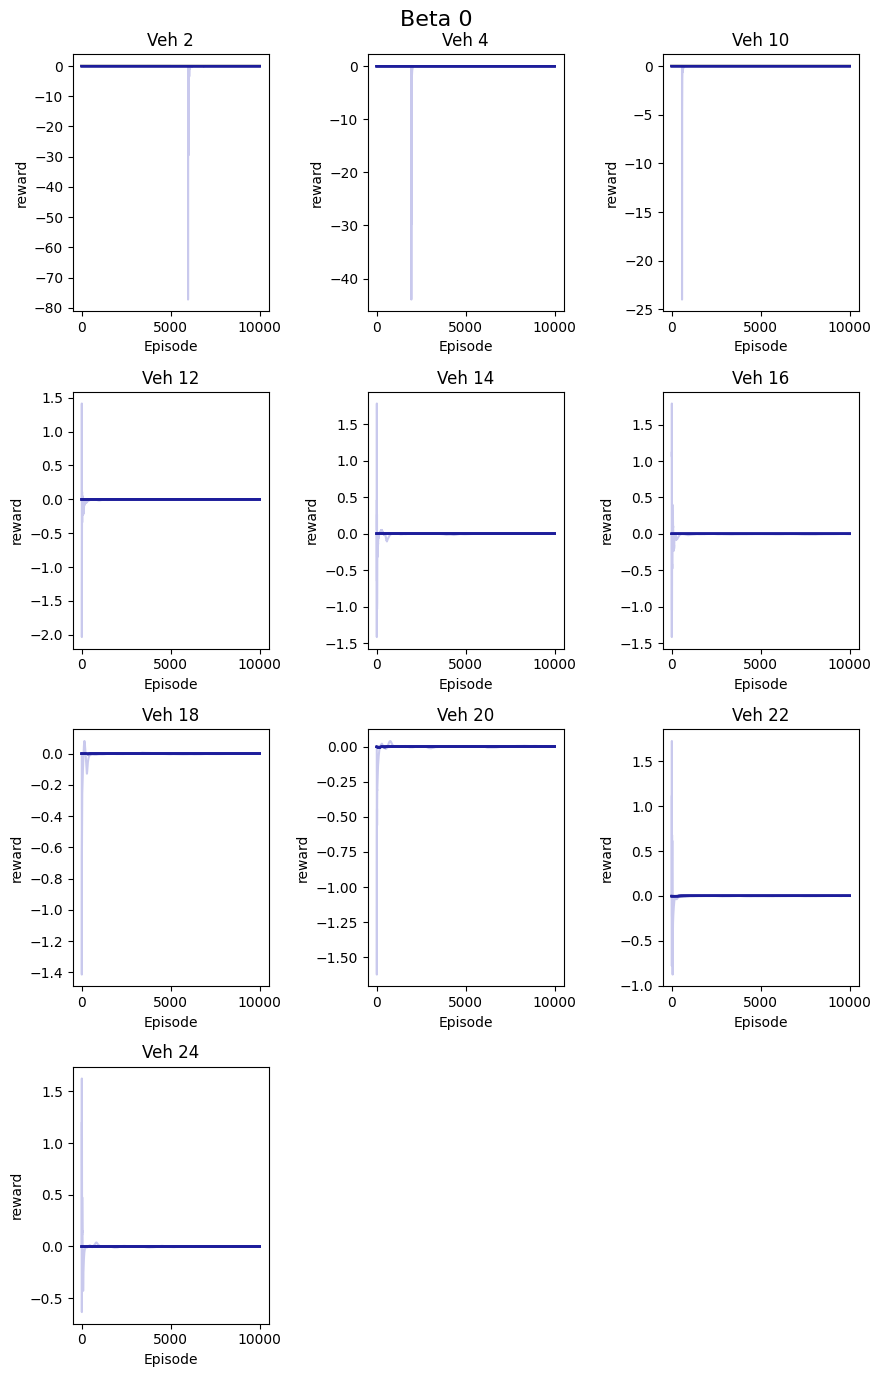

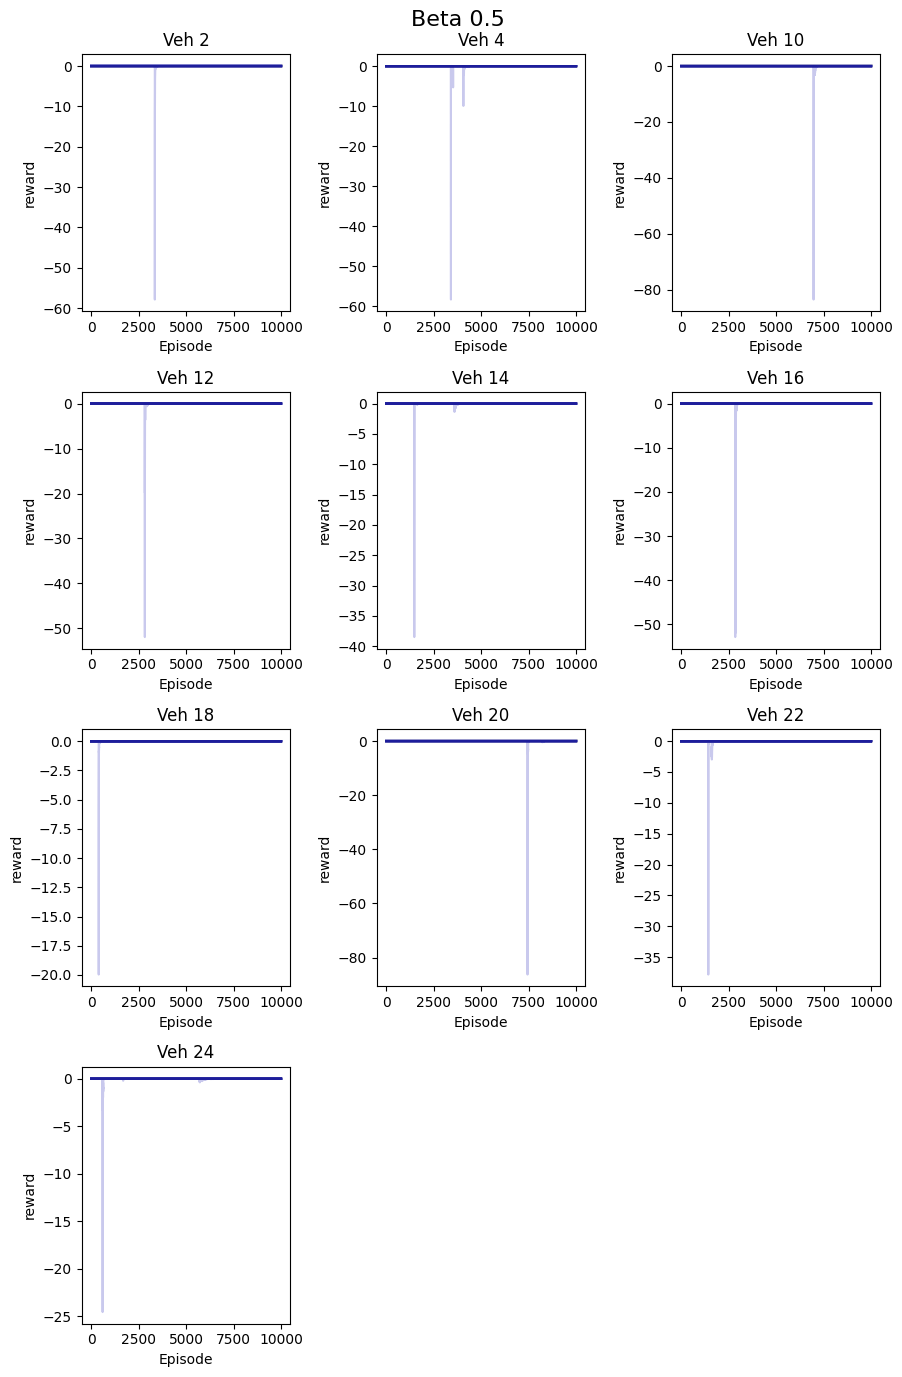

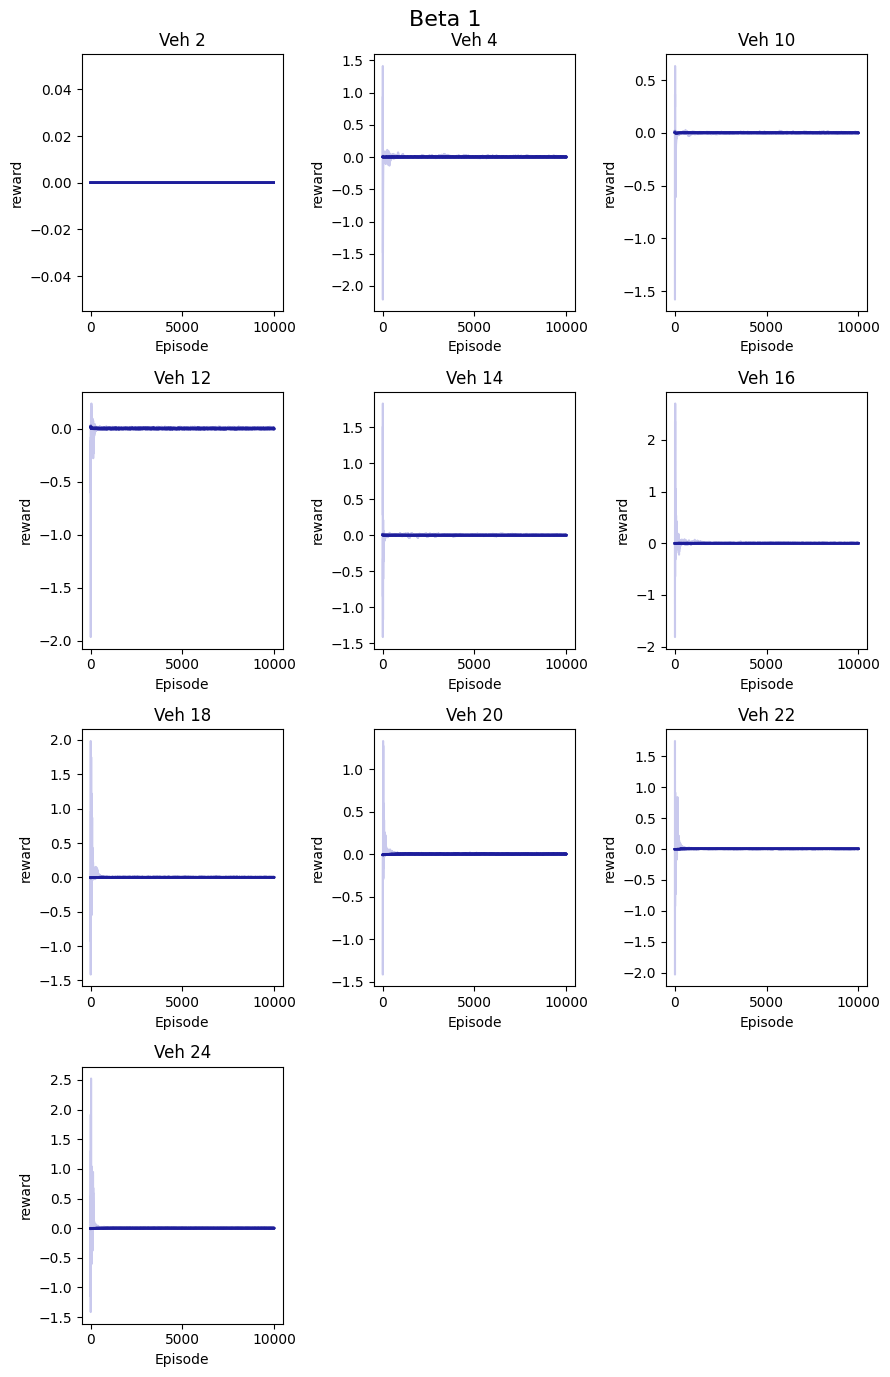

In [63]:
# Example usage
configs = [
    {"base_path": "../pareto/av_1/c_200/beta_0/", "label": "Beta 0"},
    {"base_path": "../pareto/av_1/c_200/beta_0_5/", "label": "Beta 0.5"},
    {"base_path": "../pareto/av_1/c_200/beta_1/", "label": "Beta 1"}
]

plot_mean_rewards_for_configs(configs, veh_num_array, y_label="reward")


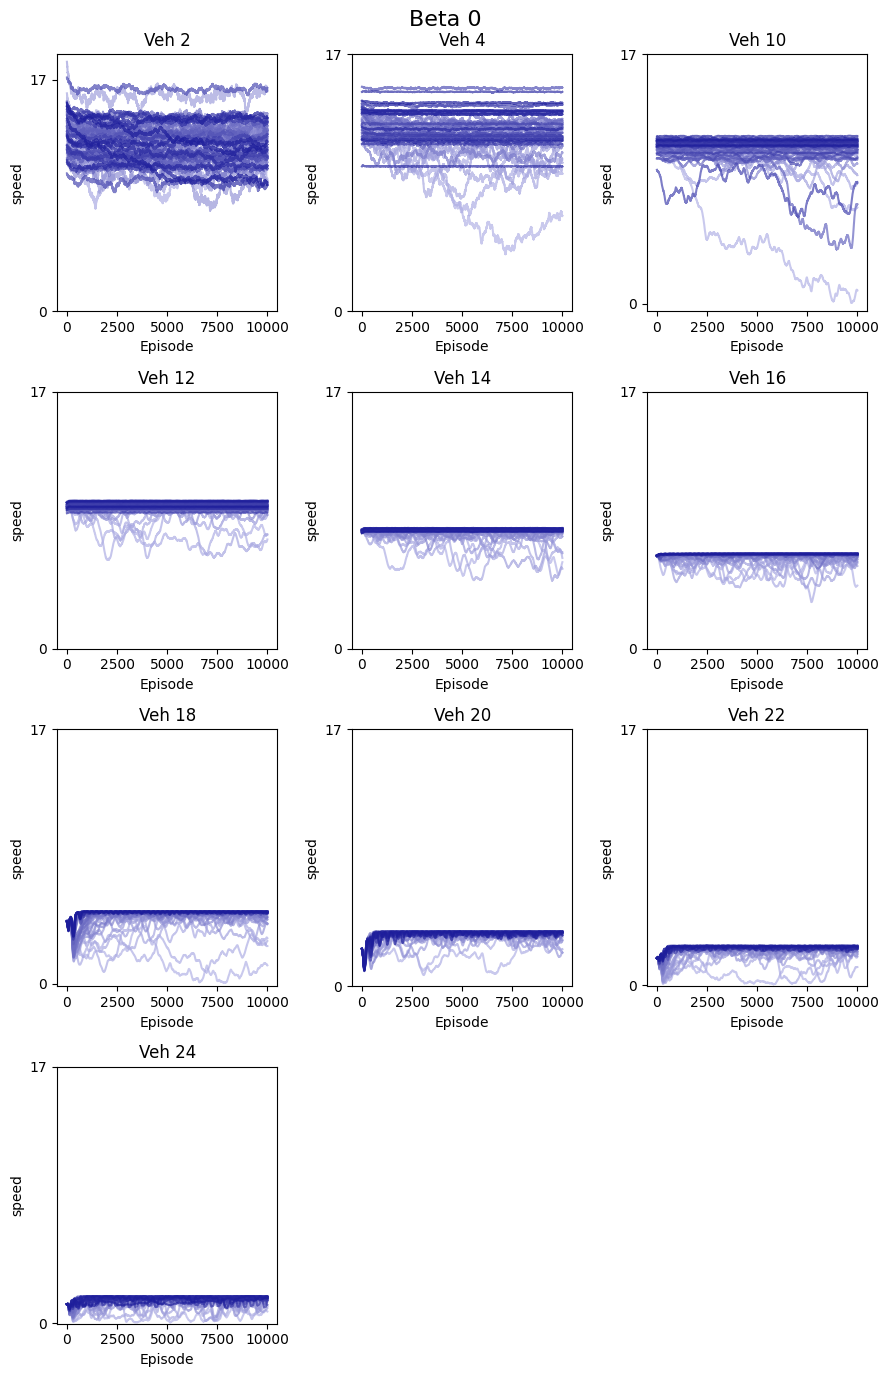

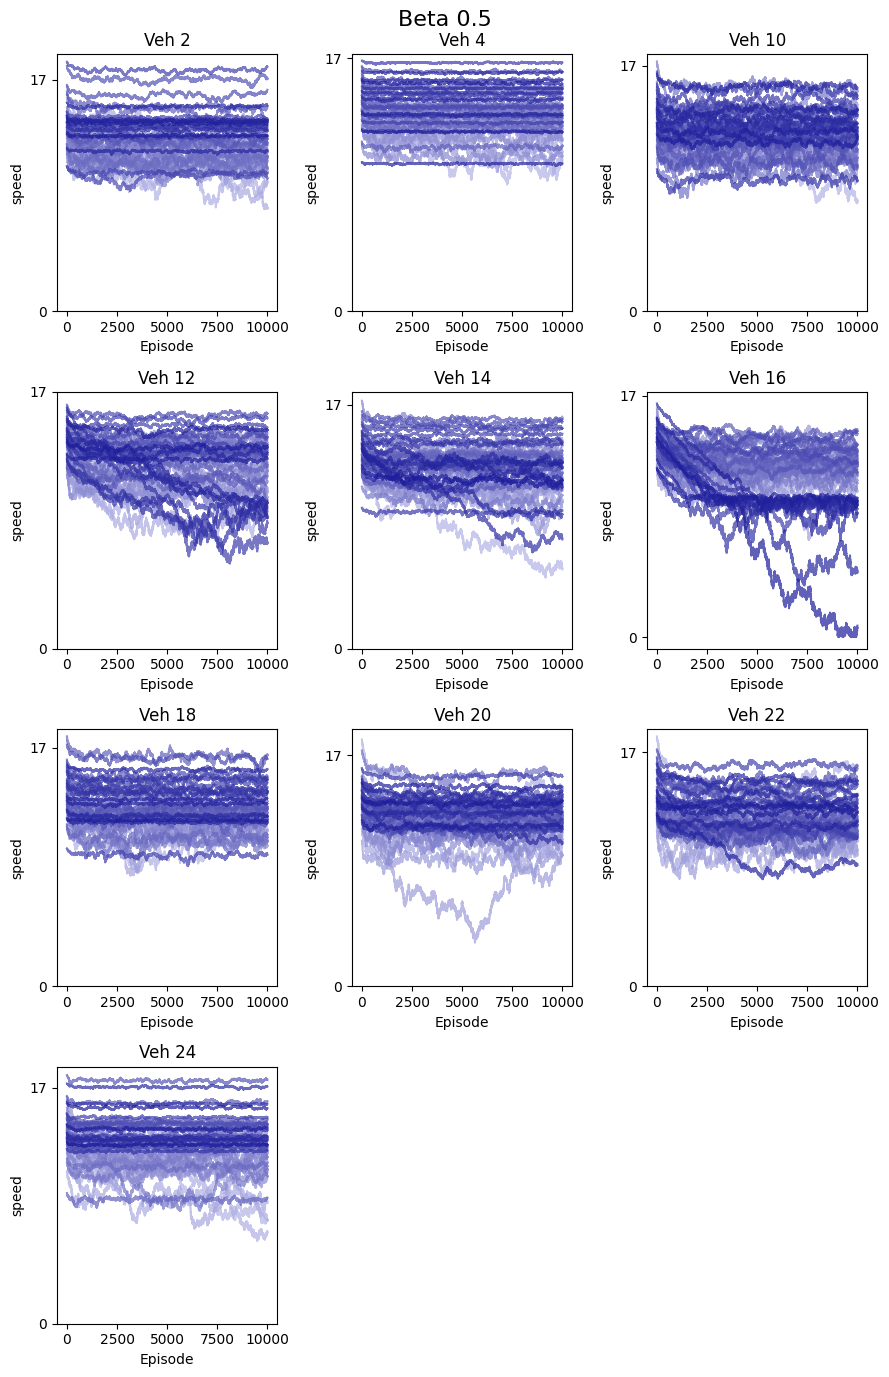

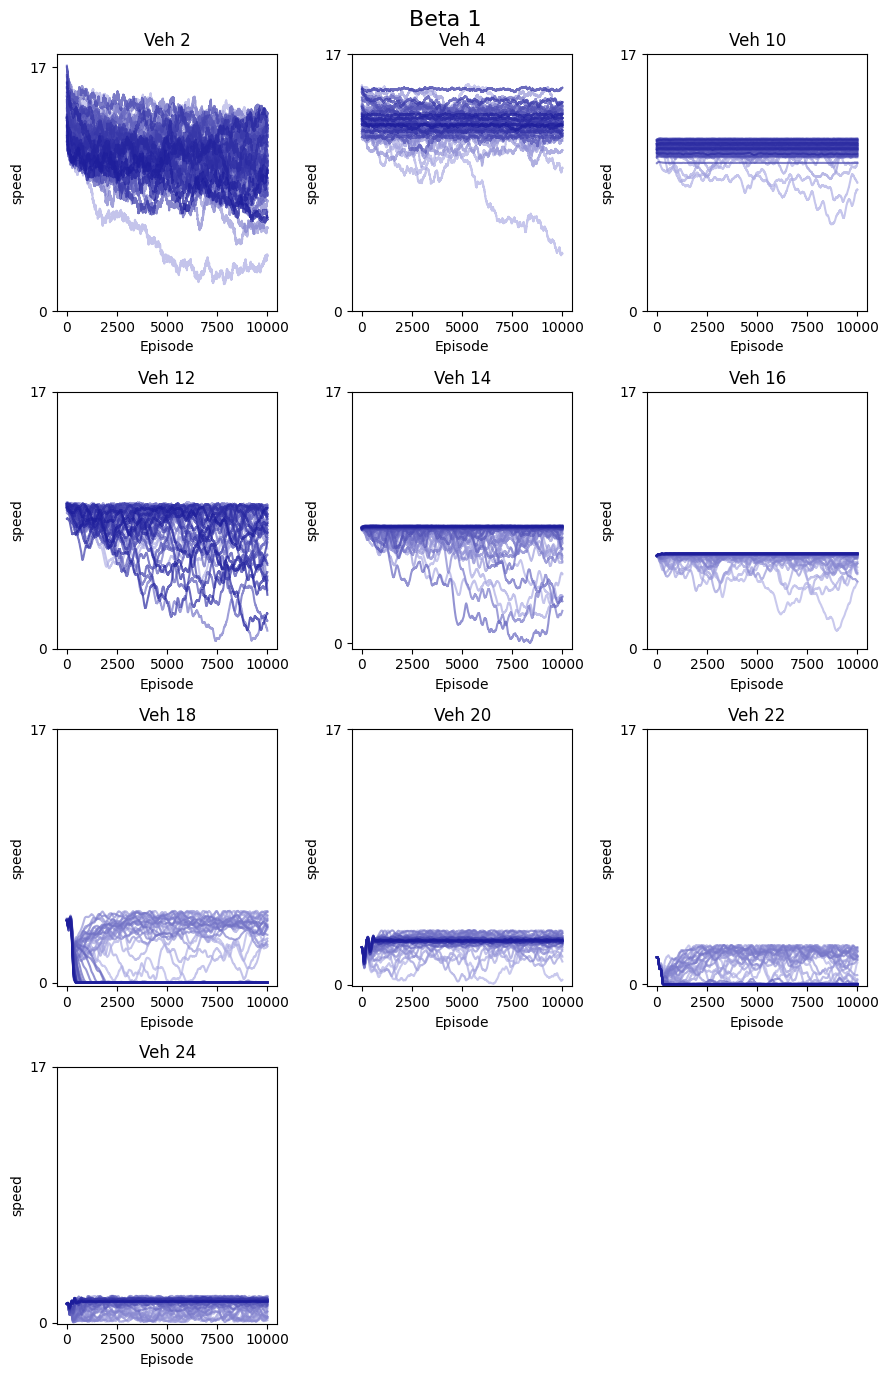

In [64]:
plot_mean_rewards_for_configs(configs, veh_num_array, y_label="speed")

In [65]:
def load_data(base_path, veh_num_array):
    """
    Load data for a given base path and vehicle numbers.

    Args:
        base_path (str): Path to the base directory.
        veh_num_array (list): List of vehicle numbers.

    Returns:
        dict: Loaded data for all vehicle numbers.
    """
    return {
        veh_num: np.load(base_path + f"/veh_{str(veh_num)}/mean_dict.npz", allow_pickle=True)
        for veh_num in veh_num_array
    }

def plot_speeds_for_configs(configs, veh_num_array, fig_size=(15, 10)):
    """
    Plot speeds for multiple configurations of vehicle data as subplots, with consistent coloring
    for the same vehicle across subplots and a single shared legend.

    Args:
        configs (list): List of configuration dictionaries with base_path and labels.
        veh_num_array (list): List of vehicle numbers.
        fig_size (tuple): Figure size for the plots.
    """
    # Initialize the figure and subplots
    n_configs = len(configs)
    fig, axes = plt.subplots(n_configs, 1, figsize=(5, 9), sharex=True, sharey=True)

    # Generate a consistent color map for vehicle numbers
    colors = plt.cm.viridis(np.linspace(0, 1, len(veh_num_array)))

    speed_ls_betas = []
    for idx, config in enumerate(configs):
        ax = axes[idx]  # Current subplot
        
        # Load data for the current configuration
        loaded_data = load_data(config["base_path"], veh_num_array)

        # Initialize a list to store mean speeds for vehicles
        speed_ls = []

        for veh_idx, veh_num in enumerate(veh_num_array):
            # Load data for the current vehicle
            mean_dict_loaded = {key: loaded_data[veh_num][key].item() for key in loaded_data[veh_num_array[0]]}
            
            # Calculate mean speed for the last 5000 episodes\
            mean_speed_ls = []
            for i in range(45):
                mean_speed = np.mean(mean_dict_loaded[str(i)]["speed"][-1][-5000:])
                mean_speed_ls.append(mean_speed)
            speed_ls.append(np.mean(np.array(mean_speed_ls)))
            
            # Plot the full speed data for the vehicle with consistent color
            ax.plot(mean_dict_loaded["0"]["speed"][-1][:], color=colors[veh_idx], label=f"Veh {veh_num}")

        # Customize subplot
        ax.set_xlabel("Horizon")
        ax.set_ylabel("Speed")
        ax.set_title(f"{config['label']} - Speed in the Last Episode")
        ax.grid(True)

        speed_ls_betas.append(speed_ls)

    # Add a single legend for all subplots
    handles = [plt.Line2D([0], [0], color=colors[idx], label=f"Veh {veh_num}") for idx, veh_num in enumerate(veh_num_array)]
    fig.legend(handles=handles, loc="upper center", ncol=len(veh_num_array), bbox_to_anchor=(0.5, 1.02))

    # Final adjustments
    plt.yticks(np.linspace(0, 17, 6))  # Set y-ticks for all subplots
    plt.tight_layout()
    plt.show()
    
    return speed_ls_betas


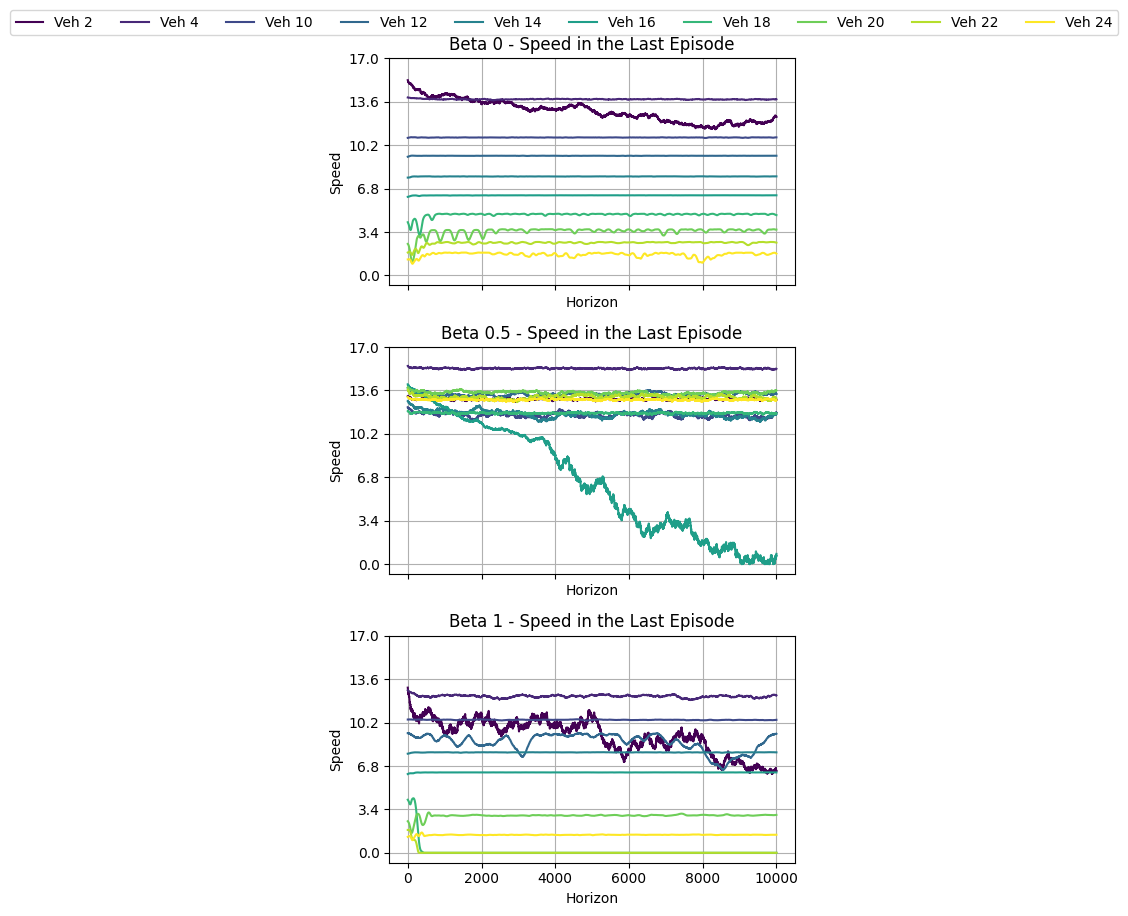

In [66]:
speed_ls_betas_hor = plot_speeds_for_configs(configs, veh_num_array)

In [67]:
configs

[{'base_path': '../pareto/av_1/c_200/beta_0/', 'label': 'Beta 0'},
 {'base_path': '../pareto/av_1/c_200/beta_0_5/', 'label': 'Beta 0.5'},
 {'base_path': '../pareto/av_1/c_200/beta_1/', 'label': 'Beta 1'}]

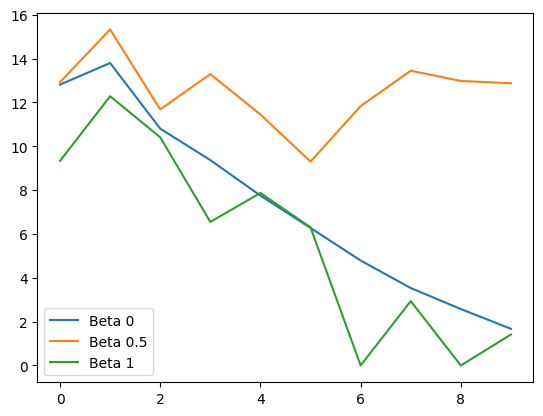

In [68]:
for i in range(len(speed_ls_betas_hor)):
    plt.plot(speed_ls_betas_hor[i], label = configs[i]["label"])
plt.legend()


### IDM

In [69]:
# Load data for vehicle flows
base_path =  "../pareto/av_0/c_200/beta_0/"
veh_colors = ((0.1, 0.1, 0.6), (0.7, 0.7, 0.9))
# veh_num_array = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]
veh_data = {veh_num: np.load(base_path+f"veh_{veh_num}/flow_eps.npy") for veh_num in veh_num_array}
mean_speed_data = {veh_num: np.load(base_path+f"veh_{veh_num}/mean_speed_eps.npy") for veh_num in veh_num_array}
veh_data[veh_num_array[0]].shape

(100, 2001)

In [70]:
def colorFader(c1, c2, mix=0):
    c1 = np.array(mpl.colors.to_rgb(c1))
    c2 = np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1 - mix) * c1 + mix * c2)


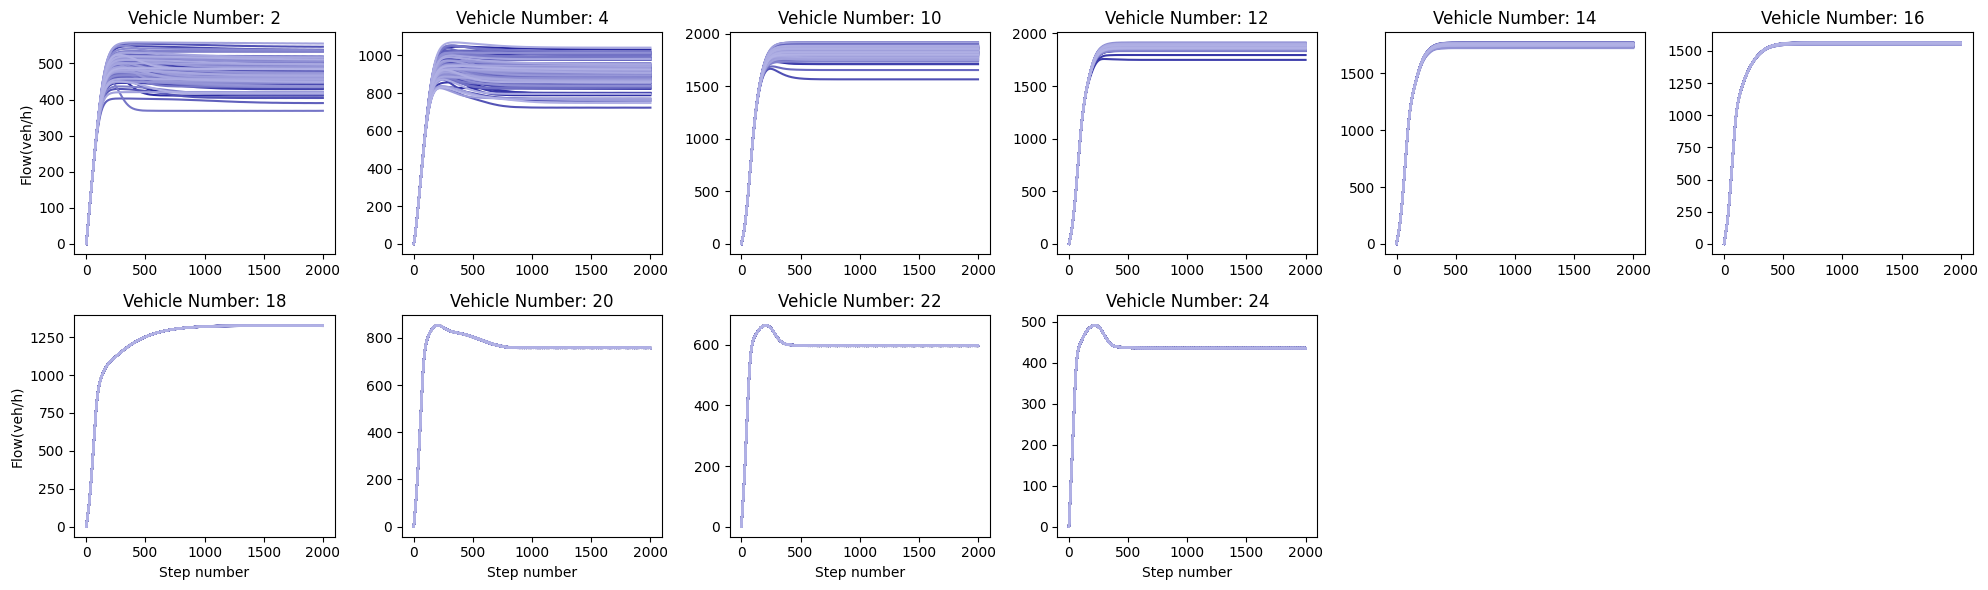

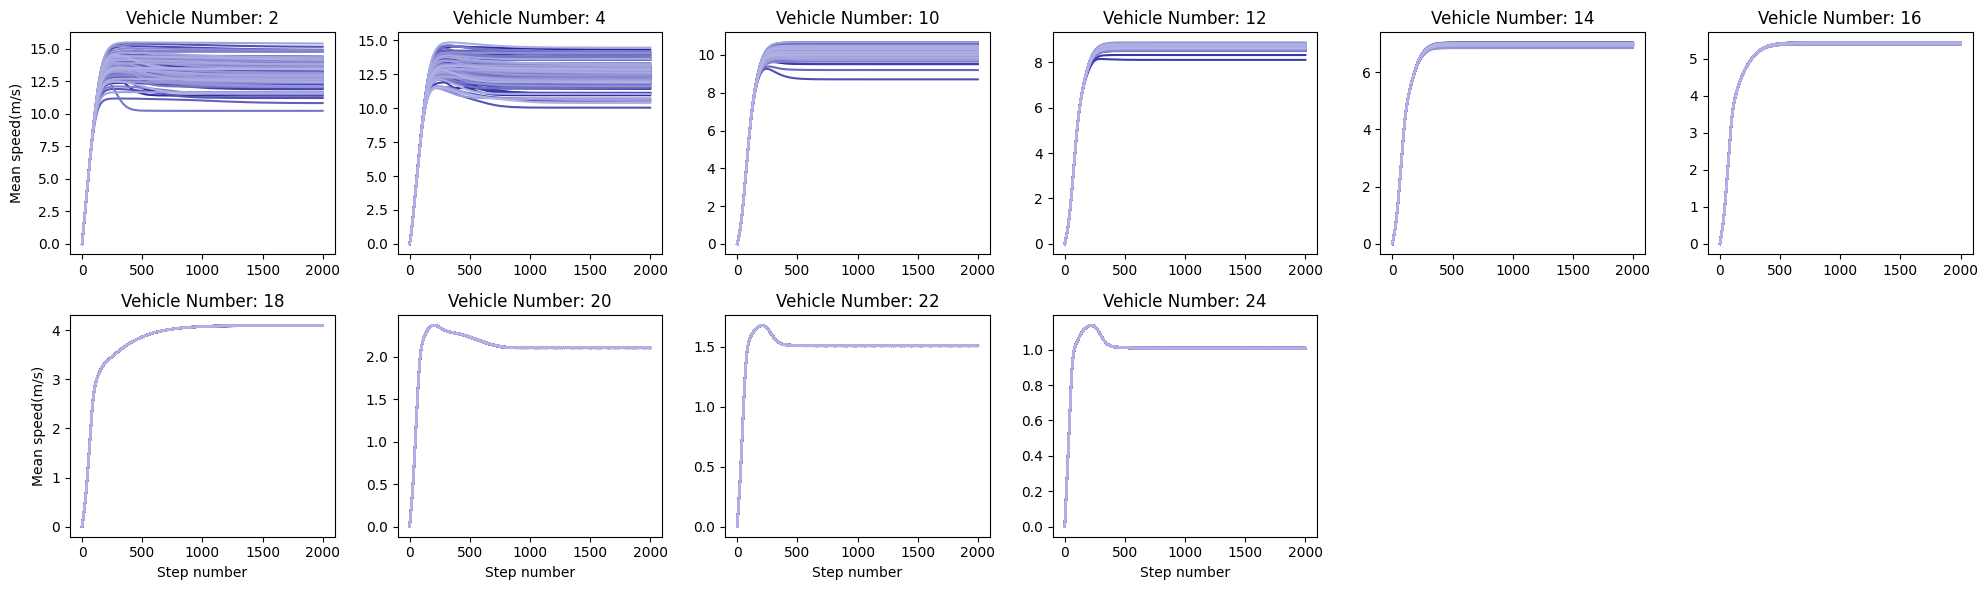

In [71]:

def plot_vehicle_data(veh_num_array, veh_data, veh_colors, y_label):
    """
    Plot data for different vehicle number experiments in a grid of subplots.
    
    Parameters:
    - veh_num_array: list of vehicle numbers for each experiment.
    - veh_data: dictionary where keys are vehicle numbers, and values are 2D arrays (evaluation times x steps).
    - veh_colors: tuple of two RGB color tuples for gradient (start and end colors).
    - y_label: string label for the y-axis.
    """
    # Define color range
    color_start, color_end = veh_colors
    
    # Calculate the number of subplots needed
    num_experiments = len(veh_num_array)
    num_cols = 6
    num_rows = (num_experiments + num_cols - 1) // num_cols  # to get enough rows
    
    # Set up the figure and axes
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 3))
    axs = axs.flatten()
    
    # Loop through each experiment and plot the data
    for idx, veh_num in enumerate(veh_num_array):
        data = veh_data[veh_num]
        n = data.shape[0]  # number of evaluation times
        x = np.arange(data.shape[1])  # x-axis values for each step number
        
        ax = axs[idx]
        for i in range(n):
            color = colorFader(color_start, color_end, i / n)
            ax.plot(x, data[i, :], color=color, label=f"veh num: {veh_num}" if i == 0 else "")
        
        ax.set_title(f"Vehicle Number: {veh_num}")
        if idx % num_cols == 0:
            ax.set_ylabel(y_label)
        if idx >= (num_rows - 1) * num_cols:
            ax.set_xlabel("Step number")
    
    # Hide any unused subplots
    for j in range(idx + 1, len(axs)):
        axs[j].axis("off")
    
    plt.tight_layout()
    plt.show()


# Call the function to plot data
plot_vehicle_data(veh_num_array, veh_data, veh_colors, "Flow(veh/h)")
plot_vehicle_data(veh_num_array, mean_speed_data, veh_colors, "Mean speed(m/s)")

In [72]:
def generate_vehicle_color_pairs(num_range):
    # Predefined color pairs (light to dark shades)
    # Provided color pairs
    color_pairs = [
        ('#FFEBEE', '#B71C1C'),   # very light red to darker red
        ('#FFF9C4', '#A18800'),   # very light yellow to darker yellow
        ('#F48FB1', '#880E4F'),   # very light magenta to darker magenta
        ('#C8E6C9', '#0A3D00'),   # very light green to darker green
        ('#FFE0B2', '#E65100'),   # very light peach to darker orange
        ('#E3F2FD', '#002171'),   # very light blue to darker blue
        ('#B2DFDB', '#004D40'),   # very light teal to darker teal
        ('#FFCCBC', '#8E0000'),   # very light orange to darker orange
        ('#D1C4E9', '#311B92'),   # very light lavender to darker indigo
        ('#F8BBD0', '#560027'),   # very light pink to darker pink
        ('#FFF3E0', '#E65100'),   # very light mango to darker mango
        ('#E1BEE7', '#2C003E'),   # very light purple to darker purple
        ('#DCEDC8', '#33691E'),   # very light mint to darker green
        ('#FFECB3', '#C56000'),   # very light amber to darker amber
        ('#CFD8DC', '#263238'),   # very light slate to darker slate
        ('#EFEBE9', '#1B0000'),   # very light brown to darker brown
        ('#F8BBD0', '#880E4F'),   # very light rose to darker rose
        ('#E0F7FA', '#00363A'),   # very light cyan to darker cyan
        ('#B3E5FC', '#01579B'),   # very light sky blue to darker sky blue
        ('#ECEFF1', '#000A12'),   # very light blue-grey to darker blue-grey
        ('#F4FF81', '#827717'),   # very light chartreuse to darker greenish yellow
        ('#F1F8E9', '#1B5E20'),   # very light green to darker green
        ('#B2EBF2', '#006064'),   # very light turquoise to darker turquoise
        ('#FFEBEE', '#B71C1C'),   # very light red to darker red (repeated)
        ('#FFF9C4', '#A18800'),   # very light yellow to darker yellow (repeated)
        ('#F48FB1', '#880E4F'),   # very light magenta to darker magenta (repeated)
        ('#C8E6C9', '#0A3D00'),   # very light green to darker green (repeated)
        ('#FFE0B2', '#E65100'),   # very light peach to darker orange (repeated)
        ('#E3F2FD', '#002171'),   # very light blue to darker blue (repeated)
    ]

    # Ensure the number range is within the color palette size
    max_colors = len(color_pairs)
    if len(num_range) > max_colors:
        raise ValueError(f"Range too large. Max supported range size is {max_colors}.")

    # Create the vehicle color dictionary
    vehicle_colors = {}
    for i, num in enumerate(num_range):
        vehicle_colors[num] = color_pairs[i]
    
    return vehicle_colors



/home/xiawu/.conda/envs/py310/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


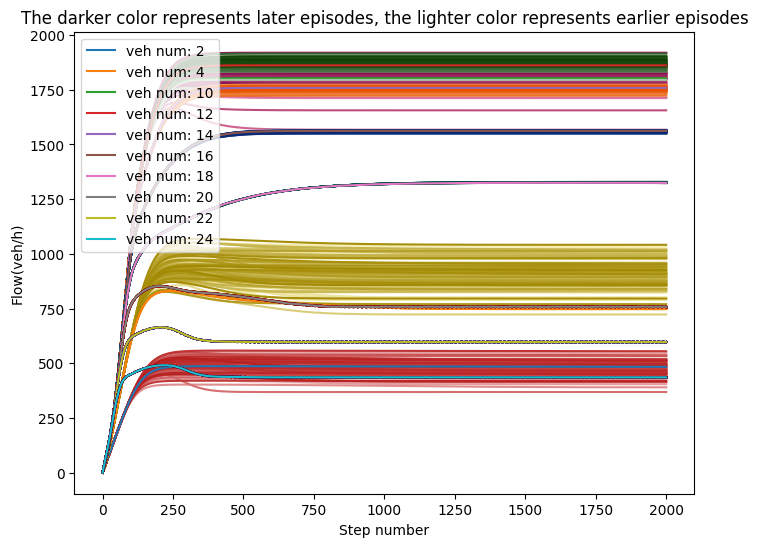

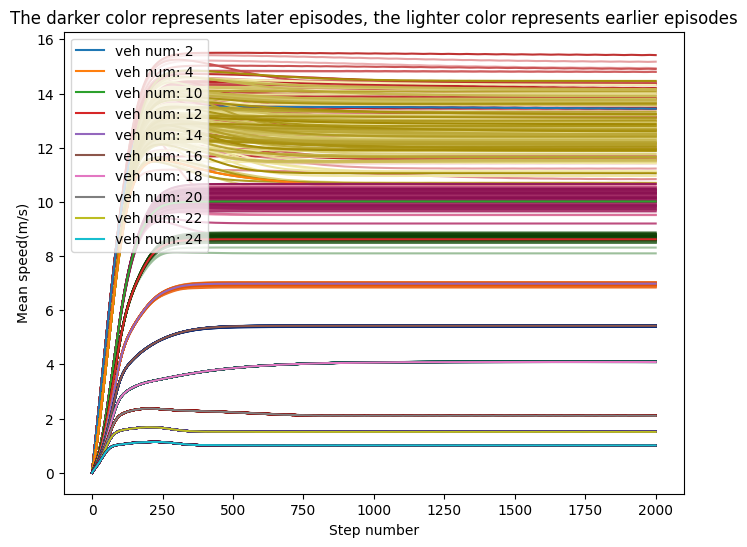

In [73]:

# Function to plot vehicle data
def plot_vehicle_data(veh_num_array, veh_data, veh_colors, label):
    fig, ax = plt.subplots(figsize=(8, 6))
    for veh_num in veh_num_array:
        data = veh_data[veh_num]
        n = data.shape[0]  # number of evaluation times
        x = range(data.shape[1])
        c1, c2 = veh_colors[veh_num]
        # Plotting each episode for the current vehicle number
        for i in range(n):
            plt.plot(x, data[i, :], color=colorFader(c1, c2, i / n))
        plt.plot(x, data[-1, :], label=f"veh num: {veh_num}")

    plt.ylabel(label, fontsize=10)
    plt.xlabel("Step number", fontsize=10)
    plt.title("The darker color represents later episodes, the lighter color represents earlier episodes")
    plt.legend()
    plt.show()
    
veh_colors = generate_vehicle_color_pairs(veh_num_array)

# Call the function to plot data
plot_vehicle_data(veh_num_array, veh_data, veh_colors, "Flow(veh/h)")
plot_vehicle_data(veh_num_array, mean_speed_data, veh_colors, label="Mean speed(m/s)")



In [74]:
speed_ls_3 = []
for i in veh_num_array:
    mean_speed = np.mean(mean_speed_data[i][:, -50:])
    speed_ls_3.append(mean_speed)
density_3 = [i /(circumference * 1e-3) for i in veh_num_array]
flow_3 = np.array([np.mean(veh_data[veh_num][:, -500:]) for veh_num in veh_num_array])

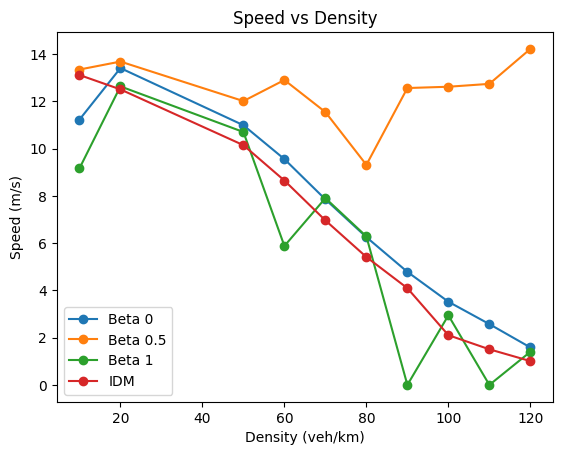

In [75]:
for i in range(len(configs)):
    plt.plot(density, speed_ls_betas[i], marker='o', label=configs[i]["label"])
plt.plot(density, speed_ls_3, marker='o', label="IDM")
plt.ylabel("Speed (m/s)", fontsize=10)
plt.xlabel("Density (veh/km)", fontsize=10)
plt.title("Speed vs Density")
plt.legend(loc="lower left")
plt.show()

In [49]:
flow_ls_betas

[array([ 80.857188, 193.13136 , 395.7408  , 412.91424 , 395.883936,
        360.290304, 310.093272, 253.58436 , 203.87862 , 137.037312]),
 array([  96.12612 ,  197.10288 ,  432.5508  ,  557.61696 ,  582.12756 ,
         536.604192,  814.37724 ,  908.8092  , 1009.31292 , 1228.89312 ]),
 array([6.59937960e+01, 1.81976400e+02, 3.85414200e+02, 2.54079504e+02,
        3.98471724e+02, 3.62086272e+02, 3.34305792e-03, 2.12062320e+02,
        1.37010971e-03, 1.21146624e+02]),
 array([ 80.857188, 193.13136 , 395.7408  , 412.91424 , 395.883936,
        360.290304, 310.093272, 253.58436 , 203.87862 , 137.037312]),
 array([  96.12612 ,  197.10288 ,  432.5508  ,  557.61696 ,  582.12756 ,
         536.604192,  814.37724 ,  908.8092  , 1009.31292 , 1228.89312 ]),
 array([6.59937960e+01, 1.81976400e+02, 3.85414200e+02, 2.54079504e+02,
        3.98471724e+02, 3.62086272e+02, 3.34305792e-03, 2.12062320e+02,
        1.37010971e-03, 1.21146624e+02]),
 array([ 80.857188, 193.13136 , 395.7408  , 412.91424 , 

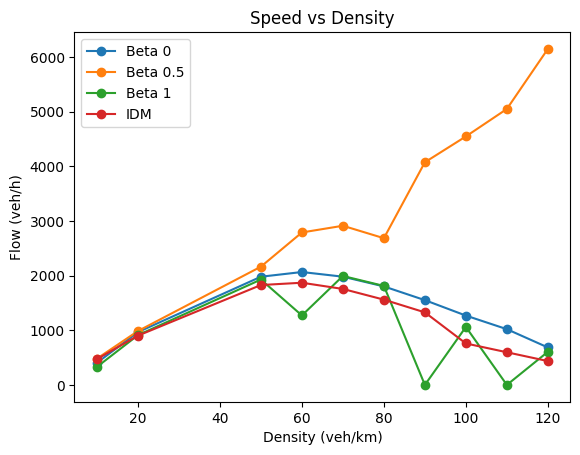

In [78]:
for i in range(len(configs)):
    plt.plot(density, flow_ls_betas[i], marker='o', label=configs[i]["label"])
plt.plot(density, flow_3, marker='o', label="IDM")
plt.ylabel("Flow (veh/h)", fontsize=10)
plt.xlabel("Density (veh/km)", fontsize=10)
plt.title("Speed vs Density")
plt.legend()
plt.show()

#### Evaluation - one shot transfering

In [36]:
### Evaluation
# Common configurations
fig_size = (5, 3)  # Standard figure size for plots
circumference = 250  # Circumference value
av = 1  # Autonomous vehicle parameter

# vehicle_numbers = list(range(2, 28, 2))  # Array of vehicle numbers from 2 to 24 with a step of 2
# vehicle_numbers = [4,6,8,12,16, 18,20,24,26 ]  # Array of vehicle numbers from 2 to 24 with a step of 2
vehicle_numbers = [4]  # Array of vehicle numbers from 2 to 24 with a step of 2
vehicle_numbers_2 = [2, 4] # learned policy
seed=0
# Paths and parameters for different beta configurations
configs = [
    {
        "base_path": f"../pareto/2_av_{av}/c_{circumference}/beta_0",
        "veh_num_array": vehicle_numbers,
        "label": "Beta 0"
    },
#     {
#         "base_path": f"automatic_vehicular_control/pareto/2_av_{av}/c_{circumference}/beta_0.5",
#         "veh_num_array": vehicle_numbers,
#         "label": "Beta 0.5"
#     },
#     {
#         "base_path": f"automatic_vehicular_control/pareto/2_av_{av}/c_{circumference}/beta_1",
#         "veh_num_array": vehicle_numbers,
#         "label": "Beta 1"
#     }
]

# Print configs for verification
for config in configs:
    print(f"Configuration: {config['label']}, Path: {config['base_path']}")

Configuration: Beta 0, Path: ../pareto/2_av_1/c_250/beta_0


In [41]:
base_path = f"../pareto/2_av_{av}/c_{circumference}/beta_0"

seed  0 veh_num  4 data shape:  (1, 33)
seed  0 veh_num  4 data shape:  (1, 33)


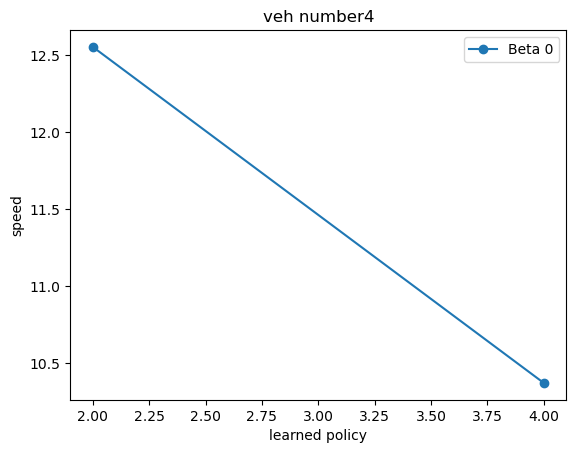

In [45]:

# Initialize lists to store processed data
mean_speed_ls = []
mean_speed_rl_ls = []
mean_speed_human_ls = []
mean_collisions_ls = []
mean_raw_ttc_ls = []
mean_raw_drac_ls = []
mean_flow_ls = []

# Process each vehicle in the provided range
for veh_num_1 in vehicle_numbers:
    m_speed_ls = []
    v_speed_ls = []
    m_collisions_ls = []
    v_collisions_ls = []
    
    m_raw_ttc_ls = []
    v_raw_ttc_ls = []
    
    m_raw_drac_ls = []
    v_raw_drac_ls = []
    
    for veh_num_2 in vehicle_numbers_2:
    
    # Read and process data
        path = f"{base_path}/seed_{seed}/veh_{veh_num_1}/eval/eval_from_veh_{veh_num_2}.csv"
        data = pd.read_csv(path)
        print("seed ", seed, "veh_num ", veh_num_1, "data shape: ", data.shape )
        m_speed_ls.append(np.mean(data["speed"]))
        v_speed_ls.append(np.var(data["speed"]))
        
        m_collisions_ls.append(np.mean(data["collisions"]))
        v_collisions_ls.append(np.var(data["collisions"]))

        m_raw_ttc_ls.append(np.mean(data["raw_ttc_mean"]))
        v_raw_ttc_ls.append(np.mean(data["raw_ttc_mean"]))

        m_raw_drac_ls.append(np.mean(data["raw_drac_mean"]))
        v_raw_drac_ls.append(np.mean(data["raw_drac_mean"]))

        # speed_rl_ls.append(np.mean(data["speed_rl"]))
        # speed_human_ls.append(np.mean(data["speed_human"]))
        # collisions_ls.append(np.mean(data["collisions"]))
        # raw_ttc_ls.append(np.mean(data["raw_ttc_mean"]))
        # raw_drac_ls.append(np.mean(data["raw_drac_mean"]))
        # flow_ls.append(np.mean(data["speed"]).item() * 3.6 * veh_num_1 /(circumference * 1e-3))

    plt.plot(vehicle_numbers_2, m_speed_ls, marker='o', label=config["label"])
    plt.fill_between(vehicle_numbers_2, m_speed_ls - np.sqrt(v_speed_ls), m_speed_ls + np.sqrt(v_speed_ls), alpha=0.2)
    ylabel="speed"
    plt.ylabel(ylabel)
    plt.xlabel("learned policy")

    plt.title(f"veh number{veh_num_1}")
    plt.legend()
    # mean_speed_ls.append(np.array(m_speed_ls))
    # # mean_speed_rl_ls.append(np.array(m_speed_rl_ls))
    # # mean_speed_human_ls.append(np.array(m_speed_human_ls))
    # mean_collisions_ls.append(np.array(m_collisions_ls))
    # mean_raw_ttc_ls.append(np.array(m_raw_ttc_ls))
    # mean_raw_drac_ls.append(np.array(m_raw_drac_ls))
        
        

 config:  {'base_path': '../pareto/2_av_1/c_250/beta_0', 'veh_num_array': [4], 'label': 'Beta 0'}
seed  0 veh_num  4 data shape:  (1, 33)
seed  0 veh_num  4 data shape:  (1, 33)
 config:  {'base_path': '../pareto/2_av_1/c_250/beta_0', 'veh_num_array': [4], 'label': 'Beta 0'}
seed  0 veh_num  4 data shape:  (1, 33)
seed  0 veh_num  4 data shape:  (1, 33)
 config:  {'base_path': '../pareto/2_av_1/c_250/beta_0', 'veh_num_array': [4], 'label': 'Beta 0'}
seed  0 veh_num  4 data shape:  (1, 33)
seed  0 veh_num  4 data shape:  (1, 33)
 config:  {'base_path': '../pareto/2_av_1/c_250/beta_0', 'veh_num_array': [4], 'label': 'Beta 0'}
seed  0 veh_num  4 data shape:  (1, 33)
seed  0 veh_num  4 data shape:  (1, 33)
 config:  {'base_path': '../pareto/2_av_1/c_250/beta_0', 'veh_num_array': [4], 'label': 'Beta 0'}
seed  0 veh_num  4 data shape:  (1, 33)
seed  0 veh_num  4 data shape:  (1, 33)
 config:  {'base_path': '../pareto/2_av_1/c_250/beta_0', 'veh_num_array': [4], 'label': 'Beta 0'}
seed  0 veh_

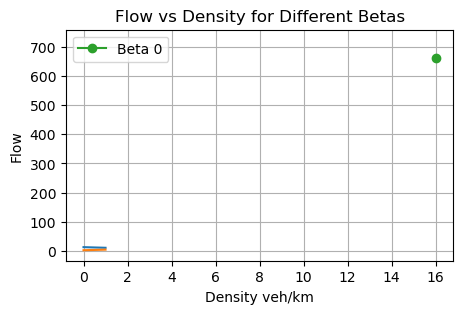

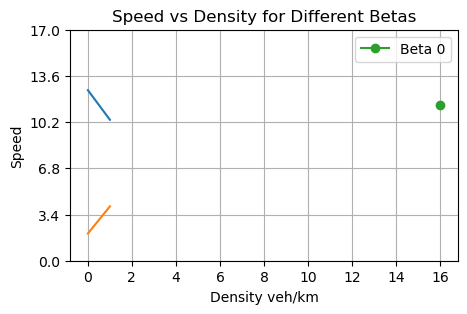

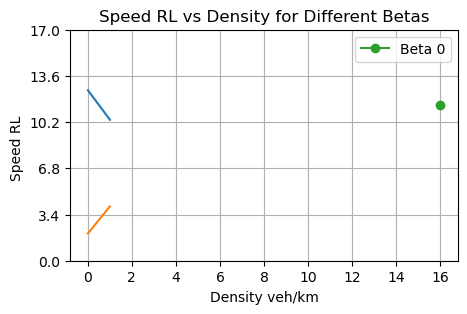

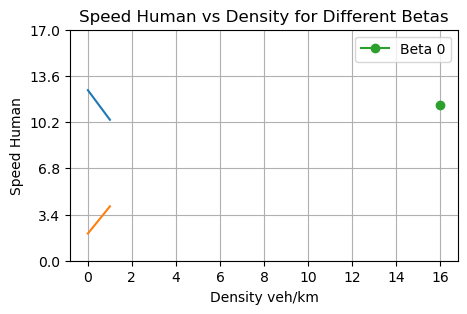

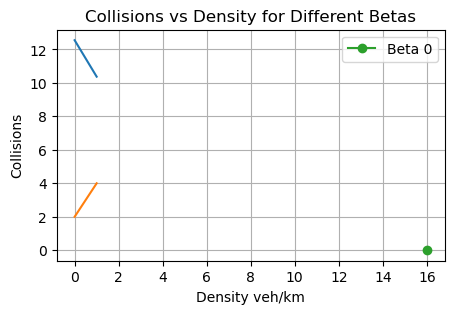

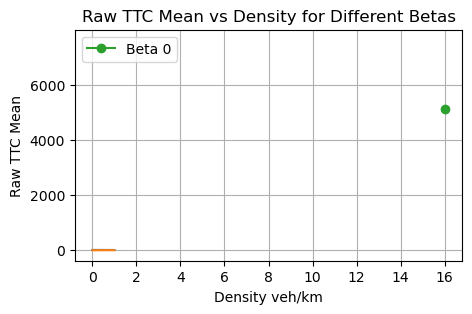

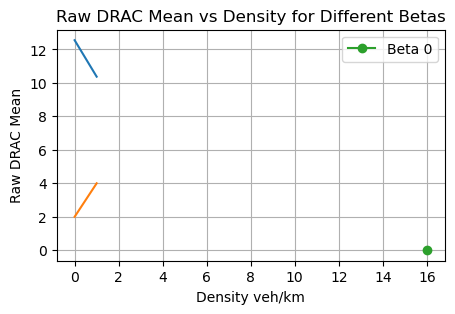

In [31]:
# Plot all metrics
metrics = ["Flow", "Speed", "Speed RL", "Speed Human", "Collisions", "Raw TTC Mean", "Raw DRAC Mean"]
speed_ls_betas = []
flow_ls_betas = []

for metric in metrics:
    plt.figure(figsize=fig_size)
    for config in configs:
        print(" config: ", config)
        # Process data
        density,  mean_flow, var_flow, mean_speed, var_speed, mean_speed_rl, var_speed_rl, mean_speed_human, var_speed_human, mean_collisions, var_collisions, mean_raw_ttc, var_raw_ttc, mean_raw_drac, var_raw_drac = process_data_different_seeds(
        config["base_path"], config["veh_num_array"], circumference=circumference)
        speed_ls_betas.append(np.array(mean_speed))
        flow_ls_betas.append(np.array(mean_flow))
        # Select metric to plot
        if metric == "Flow":
            plt.plot(density, mean_flow, marker='o', label=config["label"])
            plt.fill_between(density, mean_flow - np.sqrt(var_flow), mean_flow + np.sqrt(var_flow), alpha=0.2)
            ylabel = "Flow"
        elif metric == "Speed":
            plt.plot(density, mean_speed, marker='o', label=config["label"])
            plt.fill_between(density, mean_speed - np.sqrt(var_speed), mean_speed + np.sqrt(var_speed), alpha=0.2)
            ylabel = "Speed"
        elif metric == "Speed RL":
            plt.plot(density, mean_speed_rl, marker='o', label=config["label"])
            plt.fill_between(density, mean_speed_rl - np.sqrt(var_speed_rl), mean_speed_rl + np.sqrt(var_speed_rl), alpha=0.2)
            ylabel = "Speed RL "
        elif metric == "Speed Human":
            plt.plot(density, mean_speed_human, marker='o', label=config["label"])
            plt.fill_between(density, mean_speed_human - np.sqrt(var_speed_human), mean_speed_human + np.sqrt(var_speed_human), alpha=0.2)
            ylabel = "Speed Human"
        elif metric == "Collisions":
            plt.plot(density, mean_collisions, marker='o', label=config["label"])
            plt.fill_between(density, mean_collisions - np.sqrt(var_collisions), mean_collisions + np.sqrt(var_collisions), alpha=0.2)
            ylabel = "Collisions"
        elif metric == "Raw TTC Mean":
            plt.plot(density, mean_raw_ttc, marker='o', label=config["label"])
            plt.fill_between(density, mean_raw_ttc - np.sqrt(var_raw_ttc), mean_raw_ttc + np.sqrt(var_raw_ttc), alpha=0.2)
            ylabel = "Raw TTC Mean"
        elif metric == "Raw DRAC Mean":
            plt.plot(density, mean_raw_drac, marker='o', label=config["label"])
            plt.fill_between(density, mean_raw_drac - np.sqrt(var_raw_drac), mean_raw_drac + np.sqrt(var_raw_drac), alpha=0.2)
            ylabel = "Raw DRAC Mean"
            
    # Finalize each plot
    plt.xlabel("Density veh/km")
    plt.ylabel(ylabel)
    plt.title(f"{metric} vs Density for Different Betas")
    plt.legend()
    plt.grid(True)

    # Set y-ticks for speed-related metrics
    if metric in ["Speed", "Speed RL", "Speed Human"]:
        plt.yticks(np.linspace(0, 17, 6))  # Y-ticks from 0 to 17 with 6 intervals

# Show all plots
plt.show()

In [2]:
73/8.4

8.69047619047619

In [4]:
48/5.3

9.056603773584905